In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ML_Input_Model_Train.csv', delimiter=';')
df.tail().T

,4570,4571,4572,4573,4574
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
buildDate,1573673099000,1573673399000,1573673699000,1573674299000,1573675499000
difOpenClose,110,-50,185,50,10


In [3]:
print(len(df['status'].unique()))
print(len(df['shortlong'].unique()))
print(len(df['buildDate'].unique()))

4
2
4575


In [4]:
# df.drop('buildDate', axis=1, inplace=True)
df['buildDate'] = pd.to_datetime(df['buildDate'], unit='ms')
df.tail().T

,4570,4571,4572,4573,4574
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
difOpenClose,110,-50,185,50,10


In [5]:
df.set_index('buildDate', inplace=True)

In [6]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [7]:
df['dojy'] = df['dojy'].astype('int')
df['hammer'] = df['hammer'].astype('int')
df['breakout'] = df['breakout'].astype('int') 
df['highGulf'] = df['highGulf'].astype('int') 
df['lowGulf'] = df['lowGulf'].astype('int')

In [8]:
df.tail().T

buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
difOpenClose,110,-50,185,50,10
dojy,0,0,0,0,0


In [9]:
print(df['status'].unique())
print(df['shortlong'].unique())

['GAIN' 'LOSS' 'COMPRADO' 'VENDIDO']
['VENDIDO' 'COMPRADO']


In [10]:
df.drop(df[df['status'] == 'COMPRADO'].index, inplace=True)
df.drop(df[df['status'] == 'VENDIDO'].index, inplace=True)

df['status'].replace(to_replace='GAIN', value=1, inplace=True)
df['status'].replace(to_replace='LOSS', value=0, inplace=True)

df['shortlong'].replace(to_replace='COMPRADO', value=1, inplace=True)
df['shortlong'].replace(to_replace='VENDIDO', value=0, inplace=True)

In [11]:
df.tail().T

buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
status,1,1,0,0,1
shortlong,1,1,1,1,1
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
difOpenClose,110,-50,185,50,10
dojy,0,0,0,0,0


In [12]:
df.status.describe()

count    4564.000000
mean        0.756135
std         0.429459
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

In [13]:
len(df[df.status == 1]), len(df[df.status == 0])

(3451, 1113)

In [14]:
temp_df_one = df[df['status'] == 1][:len(df[df['status'] == 0].index)]
temp_df_zero = df[df['status'] == 0]

In [15]:
temp_df_one.status.unique(), temp_df_zero.status.unique()

(array([1]), array([0]))

In [16]:
len(temp_df_one.index), len(temp_df_zero.index)

(1113, 1113)

In [17]:
df = temp_df_one.append(temp_df_zero)
df.status.unique()

array([1, 0])

In [18]:
len(df[df.status == 1]), len(df[df.status == 0])

(1113, 1113)

In [19]:
df = df.sample(frac=1)

[Text(0.5, 0, 'status'),
 Text(1.5, 0, 'shortlong'),
 Text(2.5, 0, 'forceIndex'),
 Text(3.5, 0, 'trend2min'),
 Text(4.5, 0, 'trend5min'),
 Text(5.5, 0, 'trend10min'),
 Text(6.5, 0, 'trend15min'),
 Text(7.5, 0, 'difCand5'),
 Text(8.5, 0, 'difOpenClose'),
 Text(9.5, 0, 'dojy'),
 Text(10.5, 0, 'hammer'),
 Text(11.5, 0, 'breakout'),
 Text(12.5, 0, 'highGulf'),
 Text(13.5, 0, 'lowGulf')]

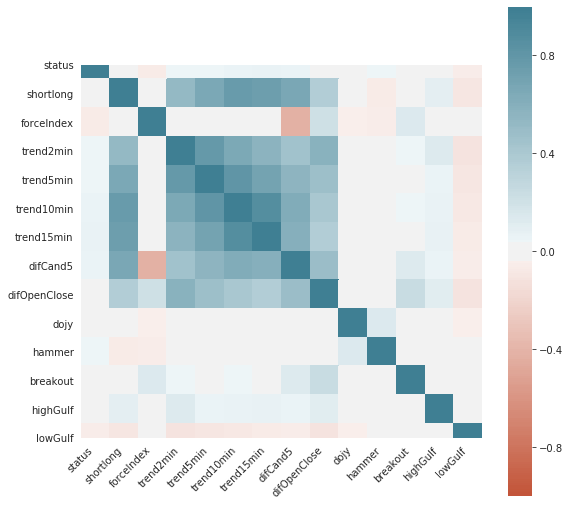

In [20]:
plt.figure(figsize=(9, 9))
ax = sns.heatmap(df.corr(),
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

In [21]:
X = df.drop('status', axis=1).values
y = df['status'].values

In [22]:
print(f'Data:\n\n{X[-5:]}\nLabels:\n\n{y[-5:]}')

Data:

[[   1   90   30   50   50   30   90   25    0    0    0    0    0]
 [   1   95   -5  -30   90  125   95  -20    0    1    0    0    0]
 [   0   85    5   35    5 -100  -85   40    0    0    0    0    0]
 [   1  245   80  140  230  190  245   60    0    0    0    0    0]
 [   0  105  -70 -115 -205 -375 -105  -30    0    0    0    0    0]]
Labels:

[0 1 0 0 1]


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
names = [
    "SVM-LINEAR", "SVM-RBF", "Gaussian Process", "Random Forest", "AdaBoost",
    "Decision Tree", 'XGB'
]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: {score}')

SVM-LINEAR: 0.515695067264574
SVM-RBF: 0.49327354260089684
Gaussian Process: 0.5022421524663677
Random Forest: 0.5246636771300448
AdaBoost: 0.5067264573991032
Decision Tree: 0.5336322869955157
XGB: 0.4798206278026906


In [26]:
xgb_model = XGBClassifier()

In [27]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [28]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ['auc', 'error']

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=0)

CPU times: user 288 ms, sys: 3.88 ms, total: 292 ms
Wall time: 291 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
xgb_model.score(X_test, y_test)

0.4798206278026906

In [30]:
xgb_model.get_booster().feature_names = [
    'shortlong', 'forceIndex', 'trend2min', 'trend5min', 'trend10min',
    'trend15min', 'difCand5', 'difOpenClose', 'dojy', 'hammer', 'breakout',
    'highGulf', 'lowGulf'
]

<Figure size 1080x504 with 0 Axes>

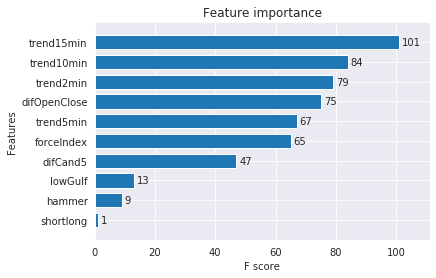

In [31]:
plt.figure(figsize=(15, 7))
plot_importance(xgb_model, height=0.72)
plt.show()

In [32]:
X = df.drop(['status', 'hammer', 'lowGulf', 'shortlong', 'dojy'],
            axis=1).values
y = df['status'].values

In [33]:
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [34]:
xgb_model = XGBClassifier(silent=False,
                          scale_pos_weight=1,
                          colsample_bytree=0.4,
                          subsample=0.8,
                          objective='binary:logistic',
                          n_estimators=1000,
                          reg_alpha=0.1,
                          max_depth=4,
                          gamma=10)

%time xgb_model.fit(X_train, y_train, verbose=0)
xgb_model.score(X_test, y_test)

CPU times: user 863 ms, sys: 0 ns, total: 863 ms
Wall time: 863 ms


0.5022421524663677

In [35]:
import tensorflow as tf

In [36]:
batch_size = 200
input_features = 9
num_classes = 2
epochs = 100

x_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

x_train = x_train.astype('float32')
test_data = x_test.astype('float32')
test_targets = Y_test

x_test = test_data[:int(len(test_data) * 0.5)]
y_test = test_targets[:int(len(test_targets) * 0.5)]

x_val = test_data[int(len(test_data) * 0.5):]
y_val = test_targets[int(len(test_targets) * 0.5):]

print(f'{x_train.shape[0]} train samples with shape {x_train.shape}')
print(f'{x_test.shape[0]} test samples with shape {x_test.shape}')
print(f'{x_val.shape[0]} val samples with shape {x_val.shape}')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

2003 train samples with shape (2003, 9)
111 test samples with shape (111, 9)
112 val samples with shape (112, 9)


In [37]:
try:
    if model:
        del model
except NameError:
    pass

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,
                          activation='relu',
                          input_shape=(input_features, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [38]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    callbacks=[tf.keras.callbacks.EarlyStopping()],
                    validation_data=(x_val, y_val))

Train on 2003 samples, validate on 112 samples
Epoch 1/100
2003/2003 - 1s - loss: 0.6963 - accuracy: 0.4848 - val_loss: 0.6866 - val_accuracy: 0.5268
Epoch 2/100
2003/2003 - 0s - loss: 0.6949 - accuracy: 0.5137 - val_loss: 0.6823 - val_accuracy: 0.5357
Epoch 3/100
2003/2003 - 0s - loss: 0.6924 - accuracy: 0.5197 - val_loss: 0.6869 - val_accuracy: 0.5446


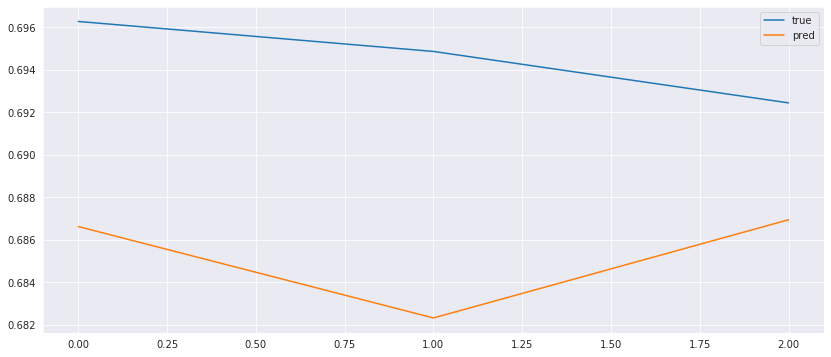

In [39]:
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='true')
plt.plot(history.history['val_loss'], label='pred')
plt.legend(loc='best')
plt.show()

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6867237918011777
Test accuracy: 0.5855856


In [41]:
model.save('MLP_0.77ACC_NADAM_45EPO_CATCROSS_2L_50_DROP0.2_100_DROP0.2_SOFTMAX.h5')